# Multilayer Perceptron from scratch

#### In the following code i tried building Multilayer Perceptron from scratch, which is one of the main building block of artificial intelligence.
#### There are many deep learning libraries exists that can be used to create neural network in single line of code.However,I've tried coding it from scratch just to clear up many important concepts like backpropogation, gradient descent and weight updation. 

##### Our shallow neural network consist single hidden layer of mutable size, sigmoid as activation function and Mean Square Error as cost function.

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [7]:
class My_MLP_Network(object):
    
    def __init__(self, x, y, hidden_layer_size, learning_rate):
        
        self.hiddenLayerSize = hidden_layer_size 
        self.inputData = x
        self.outData = y
        self.lr = learning_rate
        self.errors = []
        
        self.inputLayerSize = self.inputData.shape[1]
        self.outputLayerSize = self.outData.shape[1]
        
        # random weight initialization using 'randn' which returns sample from the standard normal distributuin.
        np.random.seed(99)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize) # For hidden layers
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize) # For output layer
     
    
    def sigmoid(self,Z): # sigmoid as an activation function
        return 1/(1+np.exp(-Z))
    
    def sigmoid_der(self,Z): # Derivative of sigmoid function
        return self.sigmoid(Z)*(1-self.sigmoid(Z)) # d/dx σ(x)=σ(x)(1−σ(x))
    
    def feed_forward(self): # Feed Forward
        self.layer1 = self.sigmoid(np.dot(self.inputData, self.W1)) # σ(W1.X)
        self.output = self.sigmoid(np.dot(self.layer1, self.W2)) # σ(W2.σ(W1.X))
        
    def back_propogation(self): # Back Propogation
        
        # Derivative of loss function with respect to W1 and W2 using chain rule
        # d_cost/dw = d_cost/d_sigmoid . d_sigmoid/dz . dz/dw
        
        delta_W2 = np.dot(self.layer1.T, (2*(self.outData - self.output) * self.sigmoid_der(self.output))) # Error with respect to W2(final layer weight matrix)
        delta_W1 = np.dot(self.inputData.T, (np.dot(2*(self.outData - self.output) * self.sigmoid_der(self.output), self.W2.T) * self.sigmoid_der(self.layer1))) # Error with respect to W1(first layer weight matrix)
        
        # Weight Updation with new delta
        self.W1 += self.lr * delta_W1
        self.W2 += self.lr * delta_W2
        
        
        self.errors.append(np.sum((self.outData - self.output)**2)/self.outData.shape[0]) # calculating error at each epoch
        
    
        
        
      
        
        

#### For training our ANN, I am taking 3 bits as X and Their XOR output as Y
#### Hidden layer size as 4
#### Learning Rate as 1
#### Epochs 50

In [8]:
mlp = My_MLP_Network(np.array([[0,0,1],[0,1,1],[0,1,0],[1,0,1]]), np.array([[1],[0],[1],[0]]), 4, 1)

#### Lets train our data for 50 iterations

In [9]:
for i in range(50):
    mlp.feed_forward()
    mlp.back_propogation()

#### Loss per Iteration

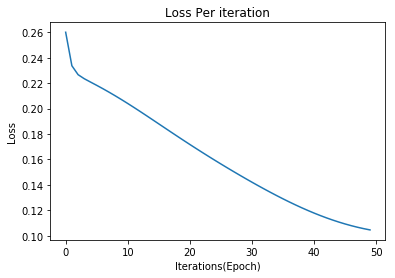

In [11]:
Lspace = list(range(50))
plt.plot(Lspace,mlp.errors)
plt.xlabel('Iterations(Epoch)')
plt.ylabel('Loss')
plt.title('Loss Per iteration')
plt.show()

We can see that loss is decreasing per iteration towards its minima almost touches zero
[I took only 4 samples to train with 4 neurons in hidden layer which then memorizes all four samples
hence we get error which very close to zero]
